# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow==2.9.1 tensorflow-gpu==2.9.1 opencv-python mediapipe sklearn matplotlib

In [76]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [77]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [78]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [79]:
# def draw_landmarks(image, results):
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS) # Draw face connections
#     mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
#     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
#     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [80]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [81]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [82]:
results

mediapipe.python.solution_base.SolutionOutputs

In [83]:
draw_styled_landmarks(frame, results)

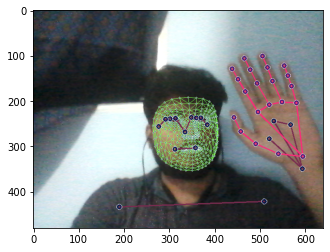

In [84]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [85]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [86]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [87]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [88]:
result_test = extract_keypoints(results)

In [89]:
result_test

array([ 0.5235225 ,  0.55974615, -0.74559915, ...,  0.        ,
        0.        ,  0.        ])

In [90]:
np.save('0', result_test)

In [91]:
np.load('0.npy')

array([ 0.5235225 ,  0.55974615, -0.74559915, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [95]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [96]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH , action , str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [102]:

capture = cv2.VideoCapture(0) #device value 0 access webcam
#access mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret , frame = capture.read() #read current frame 

                #make detections unpack results
                image, results = mediapipe_detection(frame, holistic)
                print(results)

                #draw landmarks
                draw_styled_landmarks(image,results)
                
                # Give break times to capture frames correctly
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('Anshuman Frame', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    

                    cv2.imshow('Anshuman Frame',image) # display to screen

                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break 
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    capture.release()
    cv2.destroyAllWindows()
    

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [101]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [103]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [104]:
label_map = {label:num for num, label in enumerate(actions)}

In [105]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [106]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [107]:
np.array(sequences).shape

(90, 30, 1662)

In [108]:
np.array(labels).shape

(90,)

In [109]:
X = np.array(sequences)

In [110]:
X.shape

(90, 30, 1662)

In [111]:
y = to_categorical(labels).astype(int)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [113]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [114]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [115]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [116]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [117]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [118]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 5s 80ms/step - loss: 11.1060 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 75ms/step - loss: 10.8929 - categorical_accuracy: 0.3647
Epoch 3/2000
3/3 [==============================] - 0s 76ms/step - loss: 36.4374 - categorical_accuracy: 0.1765
Epoch 4/2000
3/3 [==============================] - 0s 78ms/step - loss: 10.7584 - categorical_accuracy: 0.2824
Epoch 5/2000
3/3 [==============================] - 0s 77ms/step - loss: 2.4212 - categorical_accuracy: 0.3059
Epoch 6/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.9502 - categorical_accuracy: 0.3294
Epoch 7/2000
3/3 [==============================] - 0s 77ms/step - loss: 1.9226 - categorical_accuracy: 0.3882
Epoch 8/2000
3/3 [==============================] - 0s 73ms/step - loss: 1.3743 - categorical_accuracy: 0.4353
Epoch 9/2000
3/3 [==============================] - 0s 74ms/step - loss: 1.0396 - categorical_accuracy: 0.50

3/3 [==============================] - 0s 85ms/step - loss: 0.3827 - categorical_accuracy: 0.8588
Epoch 75/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.3654 - categorical_accuracy: 0.7765
Epoch 76/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.3942 - categorical_accuracy: 0.7882
Epoch 77/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.4187 - categorical_accuracy: 0.7765
Epoch 78/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.3392 - categorical_accuracy: 0.8235
Epoch 79/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.3235 - categorical_accuracy: 0.8824
Epoch 80/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.3096 - categorical_accuracy: 0.8353
Epoch 81/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.3740 - categorical_accuracy: 0.7294
Epoch 82/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.2745 - categorical_accuracy: 0.9059
Epoch 

3/3 [==============================] - 0s 116ms/step - loss: 0.0848 - categorical_accuracy: 0.9765
Epoch 147/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.3220 - categorical_accuracy: 0.9412
Epoch 148/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.8454 - categorical_accuracy: 0.8118
Epoch 149/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.5919 - categorical_accuracy: 0.8118
Epoch 150/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.5517 - categorical_accuracy: 0.7765
Epoch 151/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.6268 - categorical_accuracy: 0.7647
Epoch 152/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.3599 - categorical_accuracy: 0.8588
Epoch 153/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.3097 - categorical_accuracy: 0.8118
Epoch 154/2000
3/3 [==============================] - 0s 116ms/step - loss: 0.3230 - categorical_accuracy: 0

3/3 [==============================] - 0s 95ms/step - loss: 7.1226e-04 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 123ms/step - loss: 6.9887e-04 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 131ms/step - loss: 6.8359e-04 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.5581e-04 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 100ms/step - loss: 6.3452e-04 - categorical_accuracy: 1.0000
Epoch 223/2000
3/3 [==============================] - 0s 89ms/step - loss: 6.2005e-04 - categorical_accuracy: 1.0000
Epoch 224/2000
3/3 [==============================] - 0s 99ms/step - loss: 6.1223e-04 - categorical_accuracy: 1.0000
Epoch 225/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.8941e-04 - categorical_accuracy: 1.0000
Epoch 226/2000
3/3 [==============================] - 0s 101ms/step - loss: 

3/3 [==============================] - 0s 86ms/step - loss: 1.7046e-04 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.6889e-04 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.6525e-04 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.6479e-04 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.6203e-04 - categorical_accuracy: 1.0000
Epoch 293/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.5844e-04 - categorical_accuracy: 1.0000
Epoch 294/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.5583e-04 - categorical_accuracy: 1.0000
Epoch 295/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.5305e-04 - categorical_accuracy: 1.0000
Epoch 296/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.51

3/3 [==============================] - 0s 83ms/step - loss: 6.8499e-05 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 97ms/step - loss: 6.7754e-05 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 84ms/step - loss: 6.7137e-05 - categorical_accuracy: 1.0000
Epoch 361/2000
3/3 [==============================] - 0s 87ms/step - loss: 6.6463e-05 - categorical_accuracy: 1.0000
Epoch 362/2000
3/3 [==============================] - 0s 86ms/step - loss: 6.5729e-05 - categorical_accuracy: 1.0000
Epoch 363/2000
3/3 [==============================] - 0s 86ms/step - loss: 6.5244e-05 - categorical_accuracy: 1.0000
Epoch 364/2000
3/3 [==============================] - 0s 85ms/step - loss: 6.4428e-05 - categorical_accuracy: 1.0000
Epoch 365/2000
3/3 [==============================] - 0s 84ms/step - loss: 6.3799e-05 - categorical_accuracy: 1.0000
Epoch 366/2000
3/3 [==============================] - 0s 84ms/step - loss: 6.33

3/3 [==============================] - 0s 88ms/step - loss: 3.8273e-05 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.8095e-05 - categorical_accuracy: 1.0000
Epoch 430/2000
3/3 [==============================] - 0s 110ms/step - loss: 3.7768e-05 - categorical_accuracy: 1.0000
Epoch 431/2000
3/3 [==============================] - 0s 104ms/step - loss: 3.7471e-05 - categorical_accuracy: 1.0000
Epoch 432/2000
3/3 [==============================] - 0s 90ms/step - loss: 3.7255e-05 - categorical_accuracy: 1.0000
Epoch 433/2000
3/3 [==============================] - 0s 88ms/step - loss: 3.7019e-05 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 91ms/step - loss: 3.6732e-05 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 93ms/step - loss: 3.6438e-05 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 91ms/step - loss: 3.

3/3 [==============================] - 0s 95ms/step - loss: 2.4335e-05 - categorical_accuracy: 1.0000
Epoch 499/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.4212e-05 - categorical_accuracy: 1.0000
Epoch 500/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.4031e-05 - categorical_accuracy: 1.0000
Epoch 501/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.3935e-05 - categorical_accuracy: 1.0000
Epoch 502/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.3770e-05 - categorical_accuracy: 1.0000
Epoch 503/2000
3/3 [==============================] - 0s 85ms/step - loss: 2.3595e-05 - categorical_accuracy: 1.0000
Epoch 504/2000
3/3 [==============================] - 0s 87ms/step - loss: 2.3465e-05 - categorical_accuracy: 1.0000
Epoch 505/2000
3/3 [==============================] - 0s 88ms/step - loss: 2.3361e-05 - categorical_accuracy: 1.0000
Epoch 506/2000
3/3 [==============================] - 0s 84ms/step - loss: 2.32

3/3 [==============================] - 0s 93ms/step - loss: 1.6625e-05 - categorical_accuracy: 1.0000
Epoch 569/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.6536e-05 - categorical_accuracy: 1.0000
Epoch 570/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.6431e-05 - categorical_accuracy: 1.0000
Epoch 571/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.6341e-05 - categorical_accuracy: 1.0000
Epoch 572/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.6237e-05 - categorical_accuracy: 1.0000
Epoch 573/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.6157e-05 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.6052e-05 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.5999e-05 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.59

Epoch 638/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.1512e-05 - categorical_accuracy: 1.0000
Epoch 639/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.1458e-05 - categorical_accuracy: 1.0000
Epoch 640/2000
3/3 [==============================] - 0s 110ms/step - loss: 1.1391e-05 - categorical_accuracy: 1.0000
Epoch 641/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.1332e-05 - categorical_accuracy: 1.0000
Epoch 642/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.1273e-05 - categorical_accuracy: 1.0000
Epoch 643/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.1226e-05 - categorical_accuracy: 1.0000
Epoch 644/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.1156e-05 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.1094e-05 - categorical_accuracy: 1.0000
Epoch 646/2000
3/3 [==============================] - 0s 101

3/3 [==============================] - 0s 85ms/step - loss: 7.7817e-06 - categorical_accuracy: 1.0000
Epoch 708/2000
3/3 [==============================] - 0s 84ms/step - loss: 7.7480e-06 - categorical_accuracy: 1.0000
Epoch 709/2000
3/3 [==============================] - 0s 88ms/step - loss: 7.6891e-06 - categorical_accuracy: 1.0000
Epoch 710/2000
3/3 [==============================] - 0s 99ms/step - loss: 7.6442e-06 - categorical_accuracy: 1.0000
Epoch 711/2000
3/3 [==============================] - 0s 106ms/step - loss: 7.5966e-06 - categorical_accuracy: 1.0000
Epoch 712/2000
3/3 [==============================] - 0s 88ms/step - loss: 7.5685e-06 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 84ms/step - loss: 7.5222e-06 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 86ms/step - loss: 7.4633e-06 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 80ms/step - loss: 7.4

3/3 [==============================] - 0s 81ms/step - loss: 4.8228e-06 - categorical_accuracy: 1.0000
Epoch 778/2000
3/3 [==============================] - 0s 81ms/step - loss: 4.7961e-06 - categorical_accuracy: 1.0000
Epoch 779/2000
3/3 [==============================] - 0s 80ms/step - loss: 4.7639e-06 - categorical_accuracy: 1.0000
Epoch 780/2000
3/3 [==============================] - 0s 86ms/step - loss: 4.7400e-06 - categorical_accuracy: 1.0000
Epoch 781/2000
3/3 [==============================] - 0s 83ms/step - loss: 4.7064e-06 - categorical_accuracy: 1.0000
Epoch 782/2000
3/3 [==============================] - 0s 91ms/step - loss: 4.6727e-06 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 93ms/step - loss: 4.6475e-06 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 92ms/step - loss: 4.6152e-06 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 0s 83ms/step - loss: 4.59

3/3 [==============================] - 0s 83ms/step - loss: 3.3265e-06 - categorical_accuracy: 1.0000
Epoch 848/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.3139e-06 - categorical_accuracy: 1.0000
Epoch 849/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.3013e-06 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 84ms/step - loss: 3.2816e-06 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 81ms/step - loss: 3.2634e-06 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.2494e-06 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 79ms/step - loss: 3.2339e-06 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 78ms/step - loss: 3.2269e-06 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 80ms/step - loss: 3.20

3/3 [==============================] - 0s 79ms/step - loss: 2.4949e-06 - categorical_accuracy: 1.0000
Epoch 918/2000
3/3 [==============================] - 0s 82ms/step - loss: 2.4809e-06 - categorical_accuracy: 1.0000
Epoch 919/2000
3/3 [==============================] - 0s 80ms/step - loss: 2.4767e-06 - categorical_accuracy: 1.0000
Epoch 920/2000
3/3 [==============================] - 0s 90ms/step - loss: 2.4584e-06 - categorical_accuracy: 1.0000
Epoch 921/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.4500e-06 - categorical_accuracy: 1.0000
Epoch 922/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.4416e-06 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 81ms/step - loss: 2.4318e-06 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 83ms/step - loss: 2.4220e-06 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 79ms/step - loss: 2.40

3/3 [==============================] - 0s 81ms/step - loss: 1.9031e-06 - categorical_accuracy: 1.0000
Epoch 988/2000
3/3 [==============================] - 0s 81ms/step - loss: 1.8989e-06 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.8947e-06 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 79ms/step - loss: 1.8849e-06 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.8793e-06 - categorical_accuracy: 1.0000
Epoch 992/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.8736e-06 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.8680e-06 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 80ms/step - loss: 1.8596e-06 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.85

3/3 [==============================] - 0s 84ms/step - loss: 1.5385e-06 - categorical_accuracy: 1.0000
Epoch 1057/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.5413e-06 - categorical_accuracy: 1.0000
Epoch 1058/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.5315e-06 - categorical_accuracy: 1.0000
Epoch 1059/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.5230e-06 - categorical_accuracy: 1.0000
Epoch 1060/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.5230e-06 - categorical_accuracy: 1.0000
Epoch 1061/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.5188e-06 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.5146e-06 - categorical_accuracy: 1.0000
Epoch 1063/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.5104e-06 - categorical_accuracy: 1.0000
Epoch 1064/2000
3/3 [==============================] - 0s 85ms/step - 

3/3 [==============================] - 0s 84ms/step - loss: 1.2945e-06 - categorical_accuracy: 1.0000
Epoch 1126/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.2888e-06 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 84ms/step - loss: 1.2860e-06 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.2874e-06 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.2790e-06 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.2762e-06 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.2818e-06 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 87ms/step - loss: 1.2734e-06 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 88ms/step - lo

3/3 [==============================] - 0s 84ms/step - loss: 1.0126e-06 - categorical_accuracy: 1.0000
Epoch 1195/2000
3/3 [==============================] - 0s 85ms/step - loss: 1.0098e-06 - categorical_accuracy: 1.0000
Epoch 1196/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0070e-06 - categorical_accuracy: 1.0000
Epoch 1197/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0056e-06 - categorical_accuracy: 1.0000
Epoch 1198/2000
3/3 [==============================] - 0s 83ms/step - loss: 9.9854e-07 - categorical_accuracy: 1.0000
Epoch 1199/2000
3/3 [==============================] - 0s 87ms/step - loss: 9.9714e-07 - categorical_accuracy: 1.0000
Epoch 1200/2000
3/3 [==============================] - 0s 80ms/step - loss: 9.9012e-07 - categorical_accuracy: 1.0000
Epoch 1201/2000
3/3 [==============================] - 0s 82ms/step - loss: 9.9012e-07 - categorical_accuracy: 1.0000
Epoch 1202/2000
3/3 [==============================] - 0s 89ms/step - lo

3/3 [==============================] - 0s 82ms/step - loss: 8.2183e-07 - categorical_accuracy: 1.0000
Epoch 1264/2000
3/3 [==============================] - 0s 83ms/step - loss: 8.1342e-07 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 93ms/step - loss: 8.1202e-07 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 105ms/step - loss: 8.0781e-07 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 97ms/step - loss: 8.0500e-07 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 95ms/step - loss: 8.0080e-07 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 82ms/step - loss: 7.9659e-07 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 79ms/step - loss: 7.9238e-07 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 79ms/step - l

3/3 [==============================] - 0s 93ms/step - loss: 6.3250e-07 - categorical_accuracy: 1.0000
Epoch 1333/2000
3/3 [==============================] - 0s 91ms/step - loss: 6.2830e-07 - categorical_accuracy: 1.0000
Epoch 1334/2000
3/3 [==============================] - 0s 92ms/step - loss: 6.2269e-07 - categorical_accuracy: 1.0000
Epoch 1335/2000
3/3 [==============================] - 0s 95ms/step - loss: 6.1848e-07 - categorical_accuracy: 1.0000
Epoch 1336/2000
3/3 [==============================] - 0s 83ms/step - loss: 6.1427e-07 - categorical_accuracy: 1.0000
Epoch 1337/2000
3/3 [==============================] - 0s 114ms/step - loss: 6.1568e-07 - categorical_accuracy: 1.0000
Epoch 1338/2000
3/3 [==============================] - 0s 82ms/step - loss: 6.1568e-07 - categorical_accuracy: 1.0000
Epoch 1339/2000
3/3 [==============================] - 0s 87ms/step - loss: 6.1147e-07 - categorical_accuracy: 1.0000
Epoch 1340/2000
3/3 [==============================] - 0s 96ms/step - l

3/3 [==============================] - 0s 80ms/step - loss: 5.1190e-07 - categorical_accuracy: 1.0000
Epoch 1402/2000
3/3 [==============================] - 0s 77ms/step - loss: 5.1190e-07 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.1049e-07 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 84ms/step - loss: 5.1190e-07 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 81ms/step - loss: 5.0769e-07 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.0488e-07 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.0208e-07 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [==============================] - 0s 80ms/step - loss: 5.0208e-07 - categorical_accuracy: 1.0000
Epoch 1409/2000
3/3 [==============================] - 0s 78ms/step - lo

3/3 [==============================] - 0s 92ms/step - loss: 1.4909 - categorical_accuracy: 0.6353
Epoch 1472/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.9851 - categorical_accuracy: 0.5412
Epoch 1473/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.9670 - categorical_accuracy: 0.4353
Epoch 1474/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.9290 - categorical_accuracy: 0.5059
Epoch 1475/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.8937 - categorical_accuracy: 0.6235
Epoch 1476/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.8474 - categorical_accuracy: 0.6235
Epoch 1477/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.8315 - categorical_accuracy: 0.6118
Epoch 1478/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.8003 - categorical_accuracy: 0.6353
Epoch 1479/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.8024 - categorical_accura

3/3 [==============================] - 0s 88ms/step - loss: 0.9245 - categorical_accuracy: 0.5529
Epoch 1543/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.7521 - categorical_accuracy: 0.6941
Epoch 1544/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.8111 - categorical_accuracy: 0.5765
Epoch 1545/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.7242 - categorical_accuracy: 0.6235
Epoch 1546/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.6692 - categorical_accuracy: 0.6824
Epoch 1547/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6570 - categorical_accuracy: 0.7294
Epoch 1548/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.6321 - categorical_accuracy: 0.7059
Epoch 1549/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.6082 - categorical_accuracy: 0.7176
Epoch 1550/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.6130 - categorical_accurac

3/3 [==============================] - 0s 86ms/step - loss: 0.5680 - categorical_accuracy: 0.7882
Epoch 1615/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.5217 - categorical_accuracy: 0.7529
Epoch 1616/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6220 - categorical_accuracy: 0.7412
Epoch 1617/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.7140 - categorical_accuracy: 0.6941
Epoch 1618/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6997 - categorical_accuracy: 0.6588
Epoch 1619/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.6407 - categorical_accuracy: 0.6118
Epoch 1620/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.6145 - categorical_accuracy: 0.6941
Epoch 1621/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.6419 - categorical_accuracy: 0.6471
Epoch 1622/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.6023 - categorical_accurac

Epoch 1686/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.4193 - categorical_accuracy: 0.8353
Epoch 1687/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.4093 - categorical_accuracy: 0.8000
Epoch 1688/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.4431 - categorical_accuracy: 0.8000
Epoch 1689/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.4149 - categorical_accuracy: 0.8353
Epoch 1690/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.4072 - categorical_accuracy: 0.8471
Epoch 1691/2000
3/3 [==============================] - 0s 85ms/step - loss: 0.3773 - categorical_accuracy: 0.8471
Epoch 1692/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.3925 - categorical_accuracy: 0.8353
Epoch 1693/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.3753 - categorical_accuracy: 0.8353
Epoch 1694/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.3815 - cat

3/3 [==============================] - 0s 86ms/step - loss: 0.4139 - categorical_accuracy: 0.8353
Epoch 1758/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.4321 - categorical_accuracy: 0.8118
Epoch 1759/2000
3/3 [==============================] - 0s 91ms/step - loss: 0.4657 - categorical_accuracy: 0.7647
Epoch 1760/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.3925 - categorical_accuracy: 0.8000
Epoch 1761/2000
3/3 [==============================] - 0s 87ms/step - loss: 0.3880 - categorical_accuracy: 0.8118
Epoch 1762/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.4564 - categorical_accuracy: 0.7765
Epoch 1763/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.4254 - categorical_accuracy: 0.8235
Epoch 1764/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.4390 - categorical_accuracy: 0.8000
Epoch 1765/2000
3/3 [==============================] - 0s 83ms/step - loss: 0.4148 - categorical_accurac

3/3 [==============================] - 0s 83ms/step - loss: 0.2947 - categorical_accuracy: 0.9176
Epoch 1829/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.2893 - categorical_accuracy: 0.8941
Epoch 1830/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2722 - categorical_accuracy: 0.9176
Epoch 1831/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.2944 - categorical_accuracy: 0.8824
Epoch 1832/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.3698 - categorical_accuracy: 0.8588
Epoch 1833/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.4055 - categorical_accuracy: 0.8588
Epoch 1834/2000
3/3 [==============================] - 0s 78ms/step - loss: 0.3640 - categorical_accuracy: 0.8353
Epoch 1835/2000
3/3 [==============================] - 0s 76ms/step - loss: 0.3119 - categorical_accuracy: 0.8706
Epoch 1836/2000
3/3 [==============================] - 0s 77ms/step - loss: 0.3370 - categorical_accurac

Epoch 1900/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.3261 - categorical_accuracy: 0.8471
Epoch 1901/2000
3/3 [==============================] - 0s 80ms/step - loss: 0.3167 - categorical_accuracy: 0.8941
Epoch 1902/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.4133 - categorical_accuracy: 0.8471
Epoch 1903/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.5278 - categorical_accuracy: 0.7882
Epoch 1904/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.6043 - categorical_accuracy: 0.6588
Epoch 1905/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.5184 - categorical_accuracy: 0.7765
Epoch 1906/2000
3/3 [==============================] - 0s 82ms/step - loss: 0.4672 - categorical_accuracy: 0.8118
Epoch 1907/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.3987 - categorical_accuracy: 0.8471
Epoch 1908/2000
3/3 [==============================] - 0s 81ms/step - loss: 0.4129 - cat

3/3 [==============================] - 0s 80ms/step - loss: 0.2593 - categorical_accuracy: 0.8941
Epoch 1972/2000
3/3 [==============================] - 0s 89ms/step - loss: 0.2605 - categorical_accuracy: 0.8824
Epoch 1973/2000
3/3 [==============================] - 0s 79ms/step - loss: 0.2709 - categorical_accuracy: 0.9059
Epoch 1974/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.2267 - categorical_accuracy: 0.9294
Epoch 1975/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.3378 - categorical_accuracy: 0.8706
Epoch 1976/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.3602 - categorical_accuracy: 0.8471
Epoch 1977/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.3281 - categorical_accuracy: 0.8588
Epoch 1978/2000
3/3 [==============================] - 0s 86ms/step - loss: 0.2715 - categorical_accuracy: 0.8941
Epoch 1979/2000
3/3 [==============================] - 0s 84ms/step - loss: 0.2750 - categorical_accurac

In [119]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 30, 64)            442112    
                                                                 
 lstm_7 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_8 (LSTM)               (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-tr

# 8. Make Predictions

In [120]:
res = model.predict(X_test)

1/1 [==============================] - 1s 589ms/step


In [121]:
actions[np.argmax(res[4])]

'hello'

In [122]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [123]:
model.save('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [124]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [125]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 27ms/step


In [126]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [127]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[2, 1],
        [1, 1]],

       [[3, 0],
        [0, 2]],

       [[3, 1],
        [1, 0]]], dtype=int64)

In [128]:
accuracy_score(ytrue, yhat)

0.6

# 11. Test in Real Time

In [132]:
from scipy import stats

In [133]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

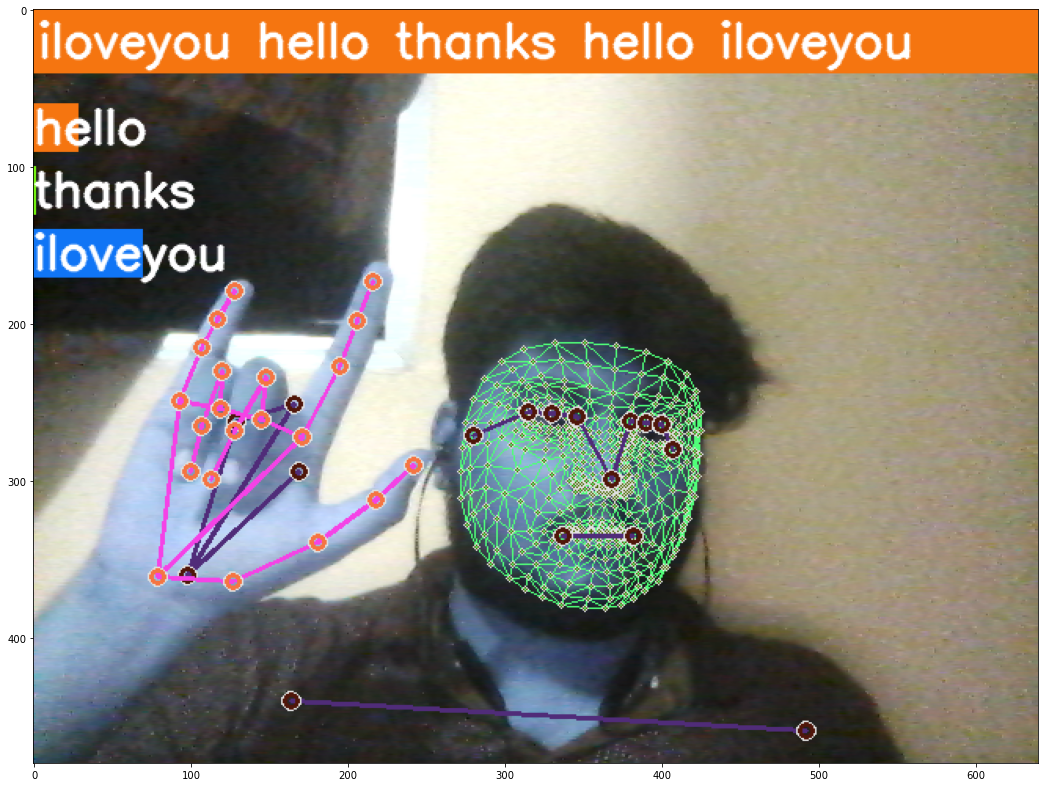

In [134]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [131]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('Anshuman', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.py

1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 21ms/step
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
thanks
<class 'mediap

1/1 [==============================] - 0s 21ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 19ms/step
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 18ms/step
hello
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 [==============================] - 0s 20ms/step
iloveyou
<cla